# Tema 3.3 Aprovechando la estructura del problema

## Subproblemas independientes

En este subtema discutiremos de qué maneras podemos aprovechar la estructura del problema, representada por el grafo de restricciones, para solucionarlo rápidamente, siguiendo un enfoque *divide y conquistarás*. Analizando detenidamente el problema de el coloreado del mapa de Australia un hecho sobresale: Tasmania no se encuentra adyaciente a otro estado, por lo que colorear Tasmania y colorear el resto de las regiones son **subproblemas independientes**. Cualquier solución para el coloreado del territorio principal combinada con cualquier solución para Tasmania conforma una solución para todo el mapa. Independencia puede ser aseverada simplemente al encontrar los **componentes conectados** del grafo de restricciones. Cada componente corresponde a un subproblema $CSP_i$. Si la asignación $S_i$ es una solución de $CSP_i$, entonces $\bigcup_i S_i$ es una solución de $\bigcup_i CSP_i$. Quizás suene muy obvio pero, ¿exáctamente por qué es esta consideración importante? Si suponemos que cada $CSP_i$ tiene $c$ variables de un total de $n$ variables, donde $c$ es constante, entonces hay $n/c$ subproblemas, de los cuales cada uno tarda máximo $d^c$ en resolver, donde $d$ es el tamaño del dominio. Por lo tanto, el trabajo total realizado es $O(d^cn/c)$, el cual es lineal en $n$; si no realizaramos esta descomposición, el trabajo total sería $O(d^n)$, el cual es exponencial en $n$. Para ilustrar la enorme diferencia que hace esta distinción, imagine el siguiente CSP:

$X=\{ b_1, b_2, b_3, ..., b_80 \}$

$D = \{0, 1\}$

$C = \{ \langle (b_1, b_2, b_3, ..., b_{20}), \bigwedge^{20}_{i=1} b_i = 1 \rangle,
        \langle (b_{21}, b_{22}, b_{23}, ..., b_{40}), \bigwedge^{40}_{i=21} b_i = 0 \rangle,
        \langle (b_{41}, b_{42}, b_{43}, ..., b_{60}), \bigwedge^{60}_{i=41} b_i = 1 \rangle,
        \langle (b_{61}, b_{62}, b_{63}, ..., b_{80}), \bigwedge^{80}_{i=61} b_i = 0 \rangle
\}$

Donde defino al operador $\bigwedge^{n}_{i=1} b_i = b_1 \land b_2 \land b_3... \land b_{n-1} \land b_{n}$

Observe que para el CSP planteado, $(b_1, b_2, b_3, ..., b_{20})$ son independientes de las demás variables que componen el problema, al igual que $(b_{21}, b_{22}, b_{23}, ..., b_{40})$, $(b_{41}, b_{42}, b_{43}, ..., b_{60})$ y $(b_{61}, b_{62}, b_{63}, ..., b_{80})$; y por lo tanto es conveniente  considerarlos como subproblemas. Considerando entonces el problema como $\bigcup_i CSP_i$ tenemos entonces que el trabajo total es $O(d^cn/c)\rightarrow O(2^{20}\cdot 80/20) = 4194304$ operaciones para resolver todo el CSP pues como se mencionó antes $\bigcup_i S_i$ es una solución de $\bigcup_i CSP_i$, en lugar de $O(2^{80}) = 1.208925\times10^{24}$.

Imagine ahora que se cuenta con una computadora capáz de realizar un $1\times10^9$ de operaciones por segundo. Para resolver el CSP dividido esta computadora tardaría $0.41943 [ms]$, encambio para el CSP no dividido tardaría $1.208925 \times 10^{15}[s]$ ¡que equivale a $3.83347062\times10^7 [a\tilde{n}os]$!.

## Problema como árbol

Los subproblemas independientes son geniales, pues reducen drásticamente la complejidad del problema, sin embargo, no suelen ser muy comúnes. Afortunadamente, exísten otras estructuras de grafos que podemos solucionar de forma muy fácil. Por ejemplo, el grafo de restricciones es un **árbol** cuando cualquier par de variables se encuentran conectadas por un solo camino. Es posible mostrar que *cualquier CSP estructurado como árbol puede ser resuelto en tiempo lineal en el número de variables*. La clave para mostrar esto es una nueva noción de consistencia, llamada **consistencia de arco dirigido** (DAC por sus siglas en Inglés). Un CSP es arco-dirigido-consistente bajo un ordenamiento de variables $X_1, X_2, ..., X_n$ si y sólo si cada $X_i$ es arco-consistente con cada $X_j$ para $j \gt i$.

Para solucionar un CSP estructurado como árbol, primero elegimos cualquier variable como raíz del árbol, y escogemos un ordenamiento de las variables tal que cada variable aparece después de su padre en el árbol. Tal ordenamiento se conoce como **ordenamiento topológico** o **topological sort** en Inglés. 

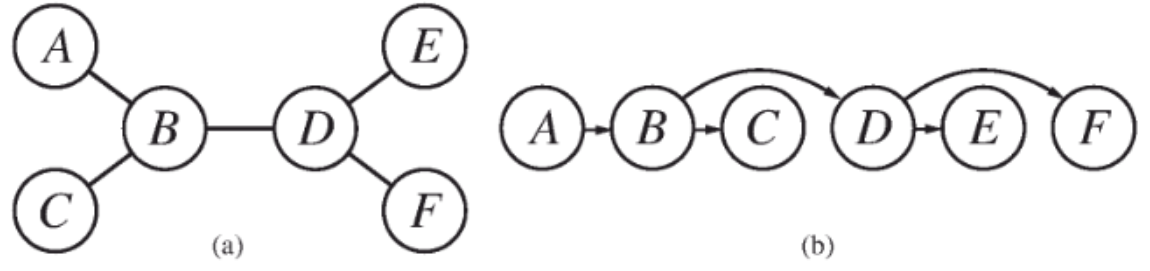

**Observe que se eligió el nodo A como raíz y el resto de los nodos le suceden como nodos hijo.**

Un árbol de $n$ nodos tiene $n-1$ arcos, por lo que se puede volver el grafo arco-dirigido consistente en $O(n)$ pasos, pues es necesario recorrer cada una de las variables solamente una vez.  Puesto que cada variable tiene $d$ elementos en su dominio y dicho dominio tiene que ser comparado con el dominio de la variable, entonces el trabajo necesario es $O(nd^2)$. Ya que tenemos un grafo arco-consistente, como el enlace que exíste entre un nodo padre y un hijo es consistente, simplemente podemos asignar cualquier valor del dominio redefinido del nodo al padre sin preocuparnos que no exísta algún valor consistente en el dominio de la siguiente variable en el árbol; ¿esto qué significa para nosotros? ¡Pues que podemos resolver el CSP sin realizar retrocesos en nuestra asignación!

Ya que tenemos un método de resolución de CSPs con peor caso lineal y que además nos garantiza no realizar backtracking, nos queda preguntarnos si otros grafos pueden ser reducidos a una estructura en árbol de alguna manera. Afortunadamente, exísten dos formas ya probadas de hacer esto; una basada en remover nodos y otra en encapsular grupos de nodos.

El algoritmo para resolver CSPs con estructura de árbol es el siguiente:

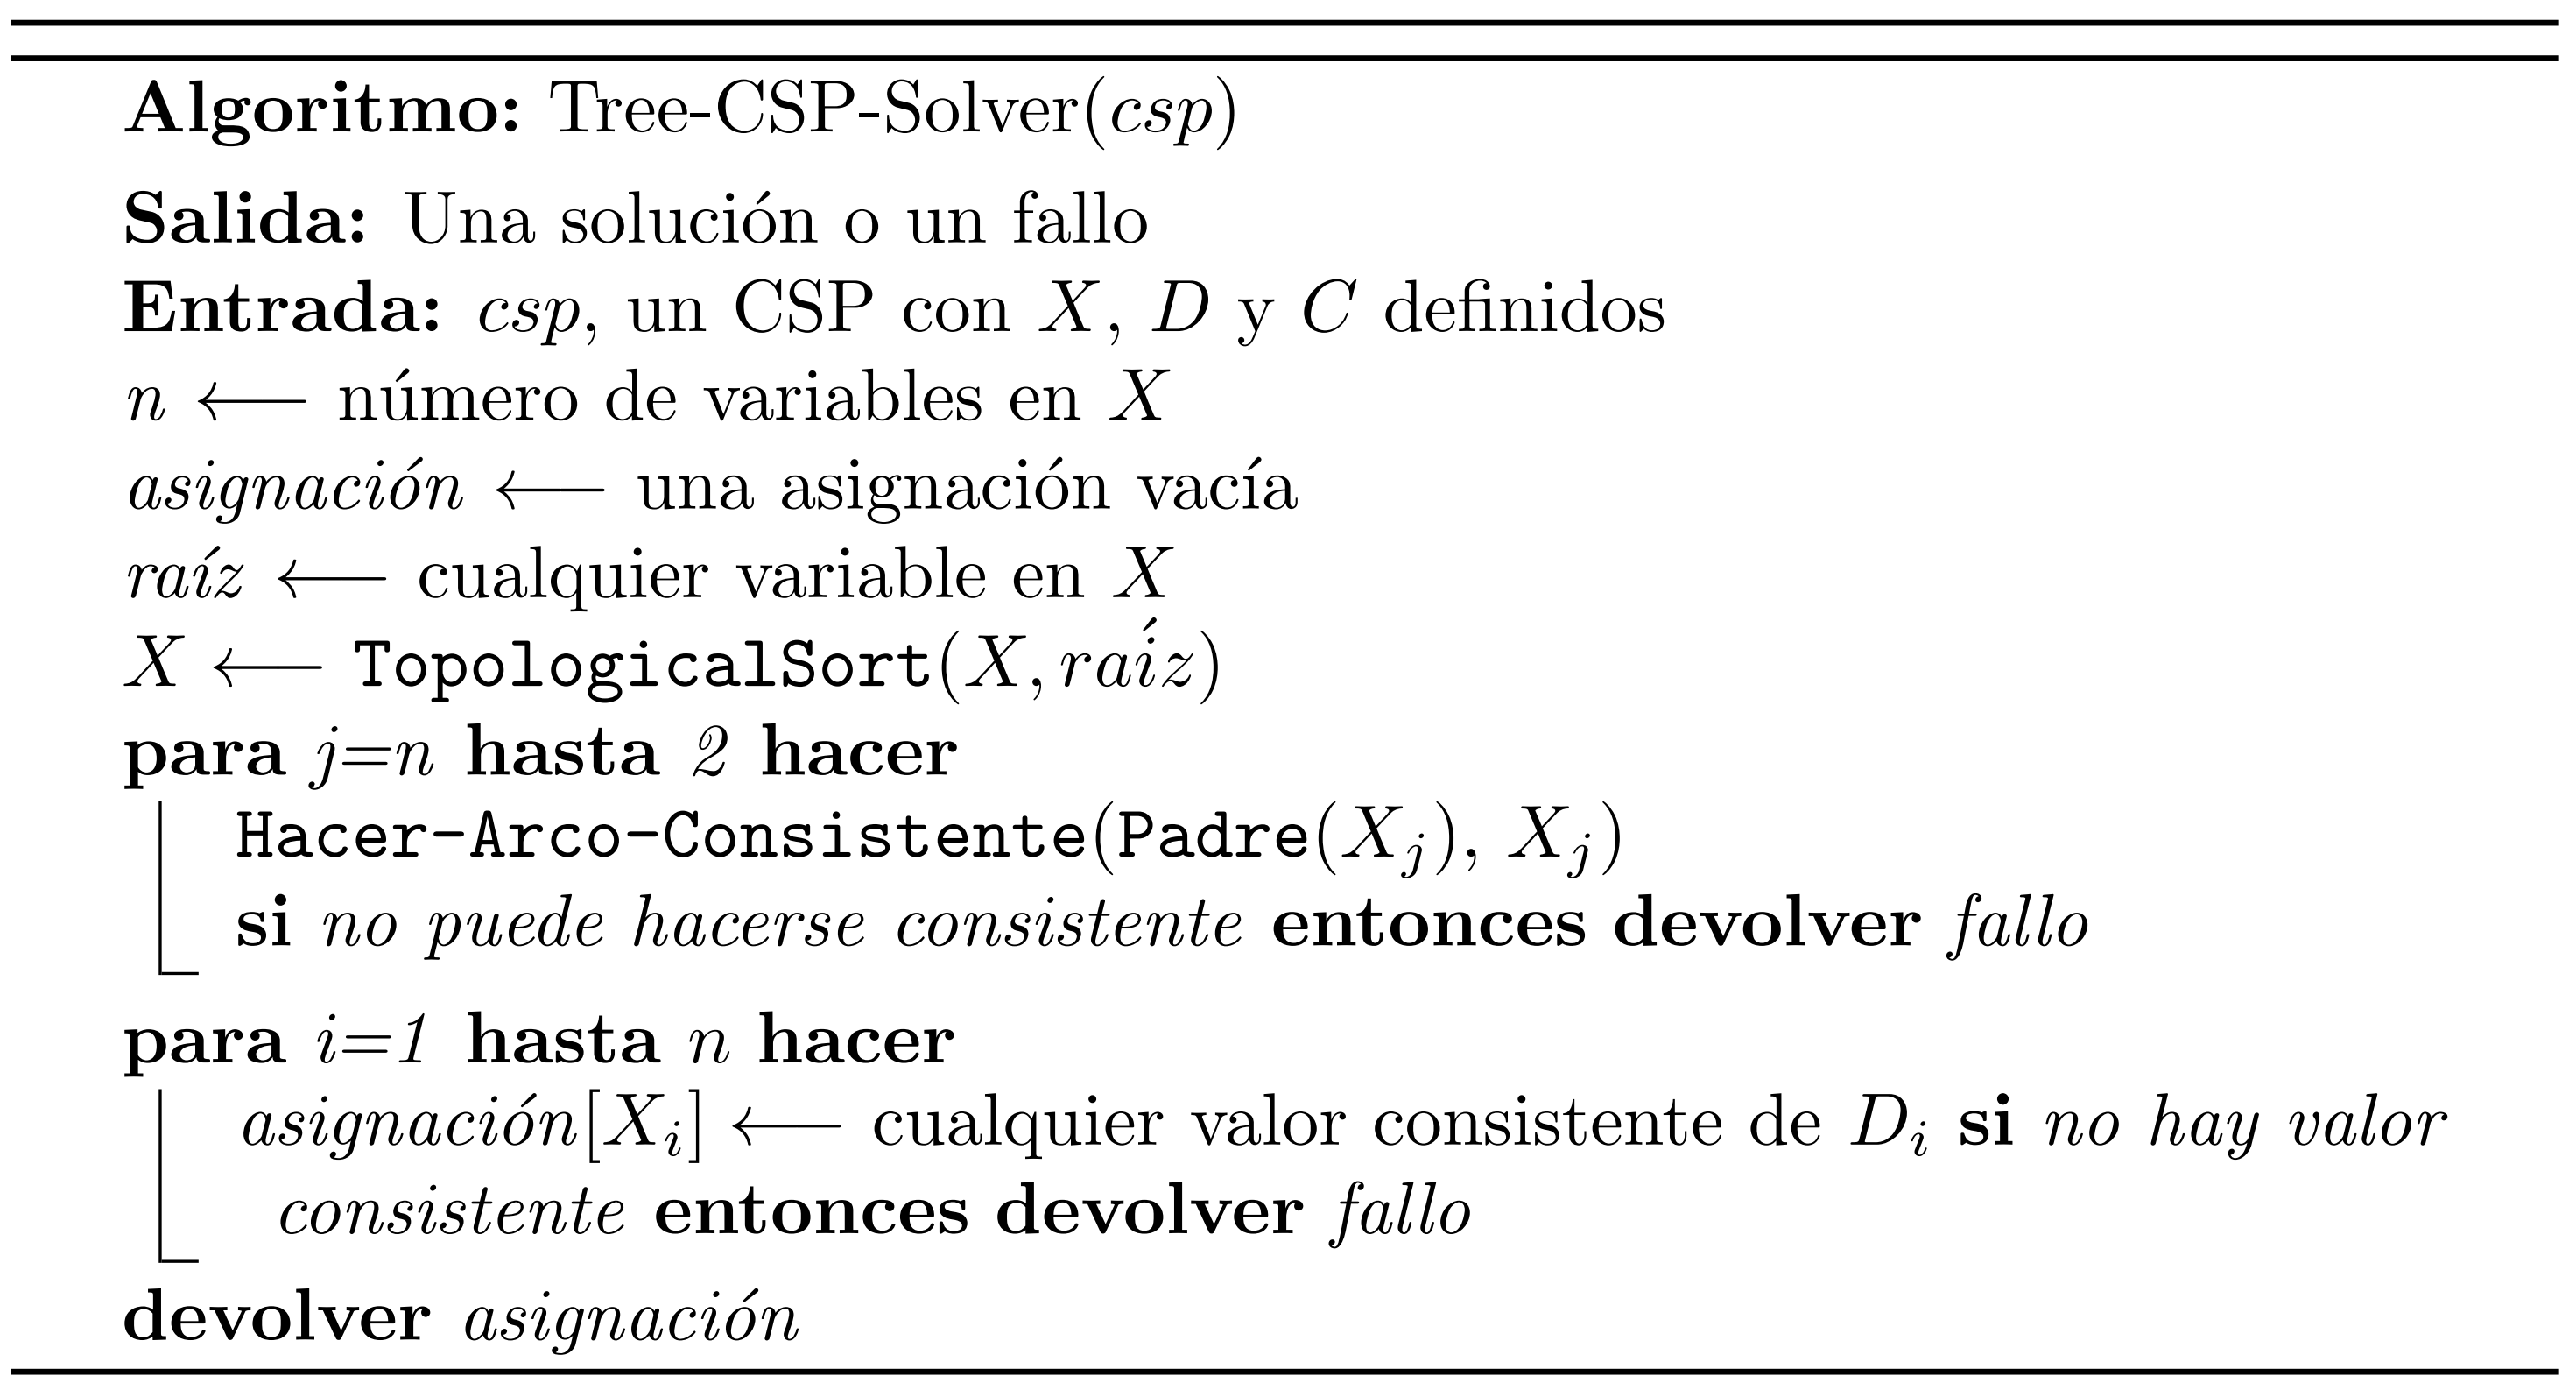

## Mejora por corte de árbol

La primer estrategia, remover nodos, involucra asignar valores a algúnas variables para que las variables restantes formen un árbol. Considere el grafo de restricciones correspondiente al coloreado del mapa de Australia. Si pudiesemos eliminar $SA$, el grafo se convertiría en un árbol. Si asignamos un valor a $SA$, observamos que para los territorios adyacentes a $SA$ se quita el valor asignado de sus dominios pues se requiere que las futuras asignaciones sean consistentes con nuestra asignación a $SA$, pero nos deja con una estructura de árbol, como muestra la figura con el inciso **(b)**.

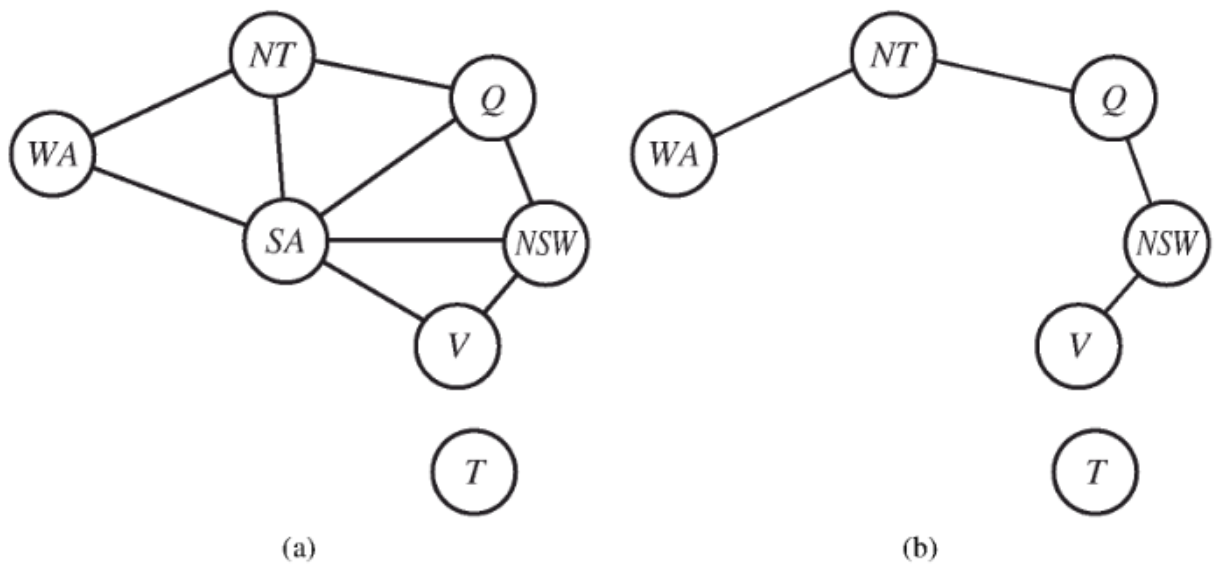

Tras asignar un valor a $SA$, cualquier solución para el CSP será consistente para dicha asignación. (Nota importante: Esto sólo funciona para CSPs binarios.) Por lo tanto, podemos resolver el árbol restante con el algoritmo $Tree-CSP-Solver$ y así solucionar el CSP completamente. Por supuesto, en el caso general, el valor escogido para $SA$ puede ser incorrecto, por lo que tendríamos que probar cada valor en el dominio de la variable asignada posible. El algoritmo para el caso general es el siguiente:

 1. Escoge un subconjunto $S$ de las variables del CSP de tal manera que el grafo de restricciones se convierte en un árbol tras remover $S$. $S$ recibe el nombre de **cycle cutset** en Inglés o, su traducción aproximada al Español, *ciclo de corte*. 
 
 2. Para cada posible asignación a las variables dentro de $S$ que satisfacen todas las restricciones en $S$,
     * remueve de los dominios de las variables restantes cualquier valor que es inconsistente con la asignación para $S$, y
     
     * Si el CSP restante tiene una solución, devolverla junto con la asignación hecha para $S$.
     
Si el ciclo de corte tiene un tamaño $c$, entonces el tiempo total de ejecución es $O(d^c \cdot (n-c)d^2)$, pues tenemos que probar cada una de las $d^c$ combinaciones a los valores para las variables en $S$, y para cada una de las combinaciones debemos resolver un problema de árbol de tamaño $n-c$. Si la estructura del grafo es muy cercana a un árbol, entonces $c$ será pequeña y los ahorros en el tiempo de ejecución a comparación de búsqueda backtracking serán enormes. Sin embargo, en el peor de los casos, $c$ puede ser $n-2$. Encontrar el ciclo de corte es un problema NP-difícil (NP-hard), aunque exísten algoritmos de aproximación eficientes, uno de ellos es el algoritmo $CC-BTD_2$ propuesto por Cedric Pinto y Cyril Terrioux en su artículo *A generalized Cycling-Clustering Approach for Solving Structured CSPs* <a href=http://www.lsis.org/terriouxc/publis/ictai2009c.pdf>[1]</a> y otro es el algoritmo $BTD$ <a href=http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.109.4339&rep=rep1&type=pdf>[2]</a>.

## Descomposición del árbol

La segunda estrategia se basa en construir una **descomposición de árbol** del grafo de restricciones en un conjunto de subproblemas conectados. Cada subproblema es resuelto de forma independiente, y la soluciones resultantes son combinadas. Esta estrategia funciona bien cuando ningún subproblema es muy grande. Una descomposición de árbol debe satisfacer los siguientes tres requisitos:

 * Cada variable en el problema original aparece al menos en uno de los subproblemas.
 * Si dos variables se encuentran conectadas por una restricción en el problema original, deben aparecer juntas (en compañía de la restricción) en al menos uno de los subproblemas.
 * Si una variable se encuentra en dos subproblemas dentro del árbol, debe aparecer entonces en cada subproblema a lo largo del camino que conecta a esos subproblemas.
 
Las primeras dos condiciones se aseguran de que todas las variables y las restricciones sean representadas en la descomposición. La tercera condición se asegura de que cualquier variable dada tenga el mísmo valor en cada subproblema en el que se encuentre. Por ejemplo, realizando la descomposición de árbol para el problema de australia, se observa que la variable $SA$ se encuentra en cada subproblema, por lo que si a $SA$ se le asignase un valor $v_m$, para todos los subproblemas en los que se encuentre $SA$, este tiene que tener el valor $v_m$.

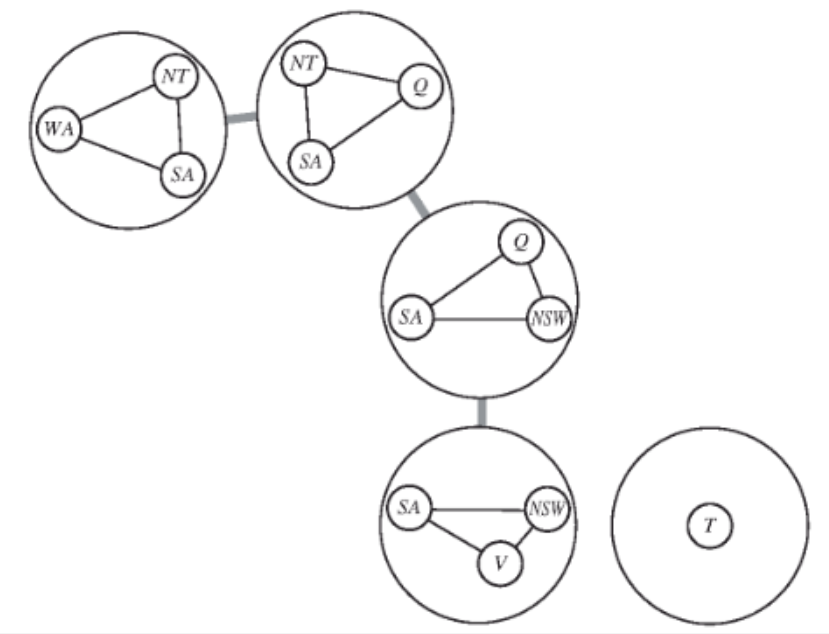

Resolvemos entonces cada subproblema de forma independiente; si alguno no tiene solución, entonces podemos asumir que el problema entero no tiene solución. Si podemos solucionar todos los subproblemas, entonces intentamos construir una solución global de la siguiente manera:

  1. Primero, tratamos a cada subproblema como un *meta-nodo* o *mega-variable* del CSP cuyo dominio es el conjunto de todas las soluciones para el subproblema. Por ejemplo, para la descomposición de árbol ilustrada por la imagen de arriba, el subproblema más hacia la izquierda es un problema de coloreado de mapas con tres variables y, por lo tanto tiene seis soluciones. Una de ellas es $\{WA = rojo, SA = azul, NT = verde\}$
  2. Después, solucionamos las restricciones que conectan a los subproblemas, utilizando el algoritmo para solucionar CSP con estructura de árbol (Tree-CSP-Solver).
   
las restricciones entre los subproblemas simplemente insisten que las soluciones para los subproblemas se encuentran de acuerdo con las asignaciones a las variables que comparten.

Un grafo de restricciones dado admite muchas descomposiciones de árbol; lo óptimo al escoger una descomposición es hacer los subproblemas tan pequeños como sea posible. El **ancho de árbol** de un grafo de descomposición de árbol es menor en uno al tamaño del subproblema más grande; la anchura del árbol del grafo mismo se define como el mínimo del ancho del árbol entre todas sus descomposiciones en árbol. Si un grafo tiene un ancho de árbol $w$ y se nos provee la descomposición de árbol correspondiente, entonces el problema puede ser solucionado en $O(nd^{w + 1})$ tiempo. Por lo tanto, *los CSPs con grafos de restricción con un ancho de árbol acotado son solucionables en tiempo polinómico*. Pero, como usualmente es el caso para las estrategias que hemos visto hasta ahora, encontrar la descomposición con ancho de árbol mínimo es un problema NP-difícil (NP-hard)<a href=https://math.mit.edu/~apost/courses/18.204-2016/18.204_Gerrod_Voigt_final_paper.pdf>[3]</a>, aunque exísten métodos heurísticos que funcionan bien en práctica<a href=https://arxiv.org/ftp/arxiv/papers/1207/1207.4127.pdf>[4]</a><a href=https://www.sciencedirect.com/science/article/pii/S0095895683710270>[5]</a><a href=https://arxiv.org/pdf/1305.1347.pdf>[6]</a>. 

# Ejercicios para el asistente

# Enlaces adicionales y fuentes consultadas:

<a href=http://www.lsis.org/terriouxc/publis/ictai2009c.pdf>[1]</a> PINTO C. *et* TERRIOUX C.; *A Generalized Cycling-Clustering Approach for Solving Structured CSPs*; Université Paul Cézanne.

<a href=http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.109.4339&rep=rep1&type=pdf>[2]</a> JÉGOU P. *et* TERRIOUX C.; *Hybrid Backtracking Bounded by Tree-Decomposition of Constraint Networks*; 2003

<a href=https://math.mit.edu/~apost/courses/18.204-2016/18.204_Gerrod_Voigt_final_paper.pdf>[3]</a> VOIGT G.; *Tree Decompositions, Treewidth, and NP-Hard Problems*; MIT.

<a href=https://arxiv.org/ftp/arxiv/papers/1207/1207.4127.pdf>[4]</a> BIDYUK B. *et* DECHTER R.; *On finding minimal $w$-cutset*; University of California Irvine, Information and Computer Science; 2004.

<a href=https://www.sciencedirect.com/science/article/pii/S0095895683710270>[5]</a> SEYMOUR P.D. *et* ROBIN T.; *Graph Searching and a Min-Max Theorem for Tree-Width*; Journal of Combinatorial Theory, Series B, 1993.

<a href=https://arxiv.org/pdf/1305.1347.pdf>[6]</a> GUPTA A., TALWAR K. *et* WITMER D.; *Sparsest Cut on Bounded Treewidth Graphs: Algorithms and Hardness Results*; Proceedings of the Annual ACM Symposium on Theory of Computing, 2013